In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.metrics import accuracy_score, precision_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [10]:
import os
for dirname, _, filenames in os.walk('/content/adult.csv'):
    for filename in filenames:
       print(os.path.join(dirname, filename))

In [11]:
file = ('/content/adult.csv')
df = pd.read_csv(file)

In [12]:
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [14]:
for i in df.columns:
        t = df[i].value_counts()
        index = list(t.index)
        print ("Count of ? in", i)
        for i in index:
            temp = 0
            if i == '?':
                    print (t['?'])
                    temp = 1
                    break
            if temp == 0:
                   print ("0")

Streaming output truncated to the last 5000 lines.
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

In [15]:
df=df.loc[(df['workclass'] != '?') & (df['native-country'] != '?')]
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
5   34    Private  198693          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country

In [16]:
df["income"] = [1 if i=='>50K' else 0 for i in df["income"]]
print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
5   34    Private  198693          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country

<ipython-input-16-595c69654189>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income"] = [1 if i=='>50K' else 0 for i in df["income"]]


In [17]:
df_more=df.loc[df['income'] == 1]
print(df_more.head())

    age         workclass  fnlwgt     education  educational-num  \
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
7    63  Self-emp-not-inc  104626   Prof-school               15   
10   65           Private  184454       HS-grad                9   
14   48           Private  279724       HS-grad                9   

        marital-status         occupation relationship   race gender  \
2   Married-civ-spouse    Protective-serv      Husband  White   Male   
3   Married-civ-spouse  Machine-op-inspct      Husband  Black   Male   
7   Married-civ-spouse     Prof-specialty      Husband  White   Male   
10  Married-civ-spouse  Machine-op-inspct      Husband  White   Male   
14  Married-civ-spouse  Machine-op-inspct      Husband  White   Male   

    capital-gain  capital-loss  hours-per-week native-country  income  
2              0             0              40  United-States       1  
3           76

In [18]:
workclass_types = df_more['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)
print(workclass_types)
print(aggregate)
print(labels)

Private             7251
Self-emp-not-inc    1059
Local-gov            915
Self-emp-inc         912
Federal-gov          549
State-gov            520
Without-pay            2
Name: workclass, dtype: int64
[7251, 1059, 915, 912, 549, 520, 2]
['Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc', 'Federal-gov', 'State-gov', 'Without-pay']


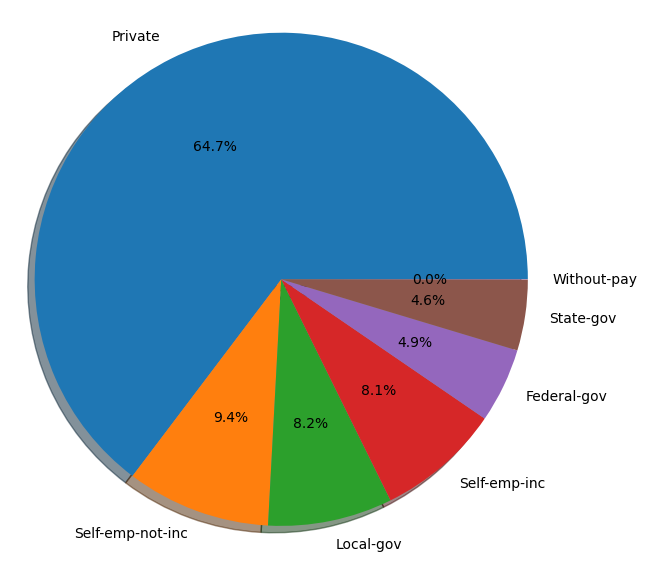

In [19]:
plt.figure(figsize=(7,7))
plt.pie(aggregate, labels=labels, autopct='%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

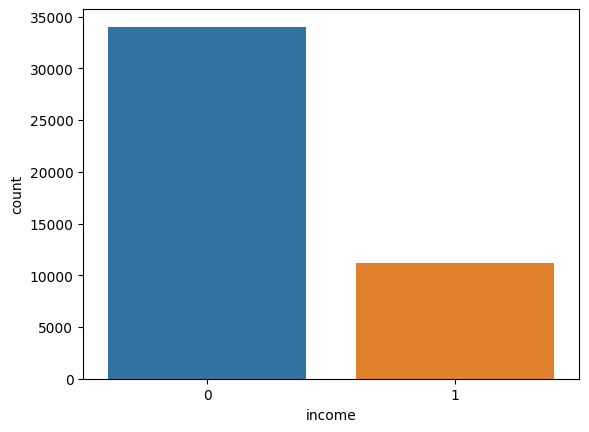

0    34024
1    11208
Name: income, dtype: int64

In [20]:
#Count plot on single categorical variable
sns.countplot(x ='income', data = df)
plt.show()
df['income'].value_counts()

<ipython-input-21-c01c35a847eb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


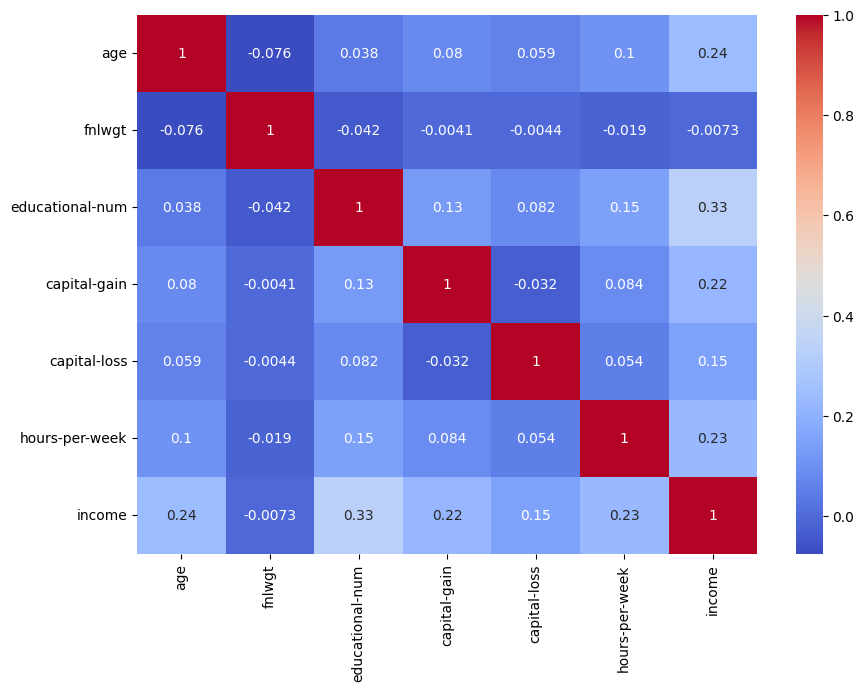

None


<ipython-input-21-c01c35a847eb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color="red", bins=100)


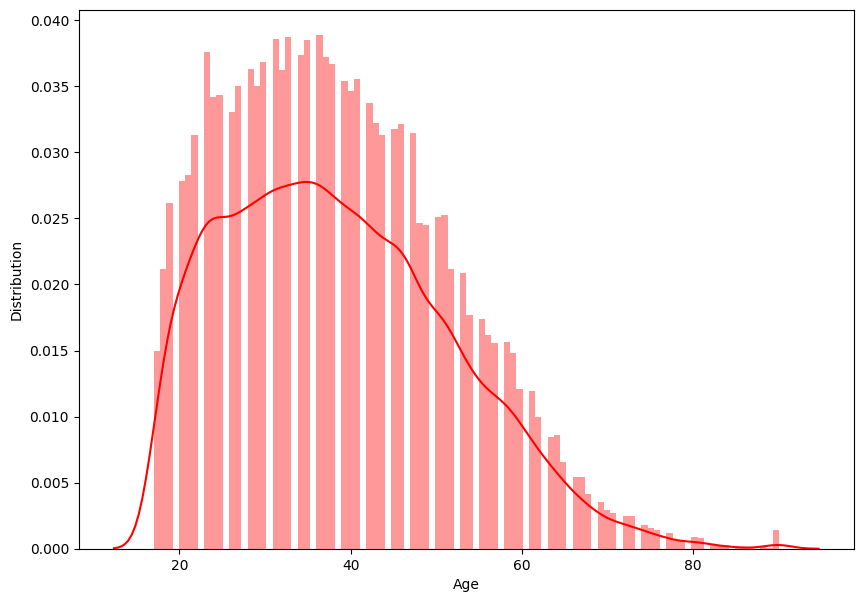

In [21]:
#Plot figsize
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
print(plt.show())
plt.figure(figsize=(10,7))
sns.distplot(df['age'], color="red", bins=100)
plt.ylabel("Distribution", fontsize = 10)
plt.xlabel("Age", fontsize = 10)
plt.show()

<ipython-input-23-7a464b88dd69>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


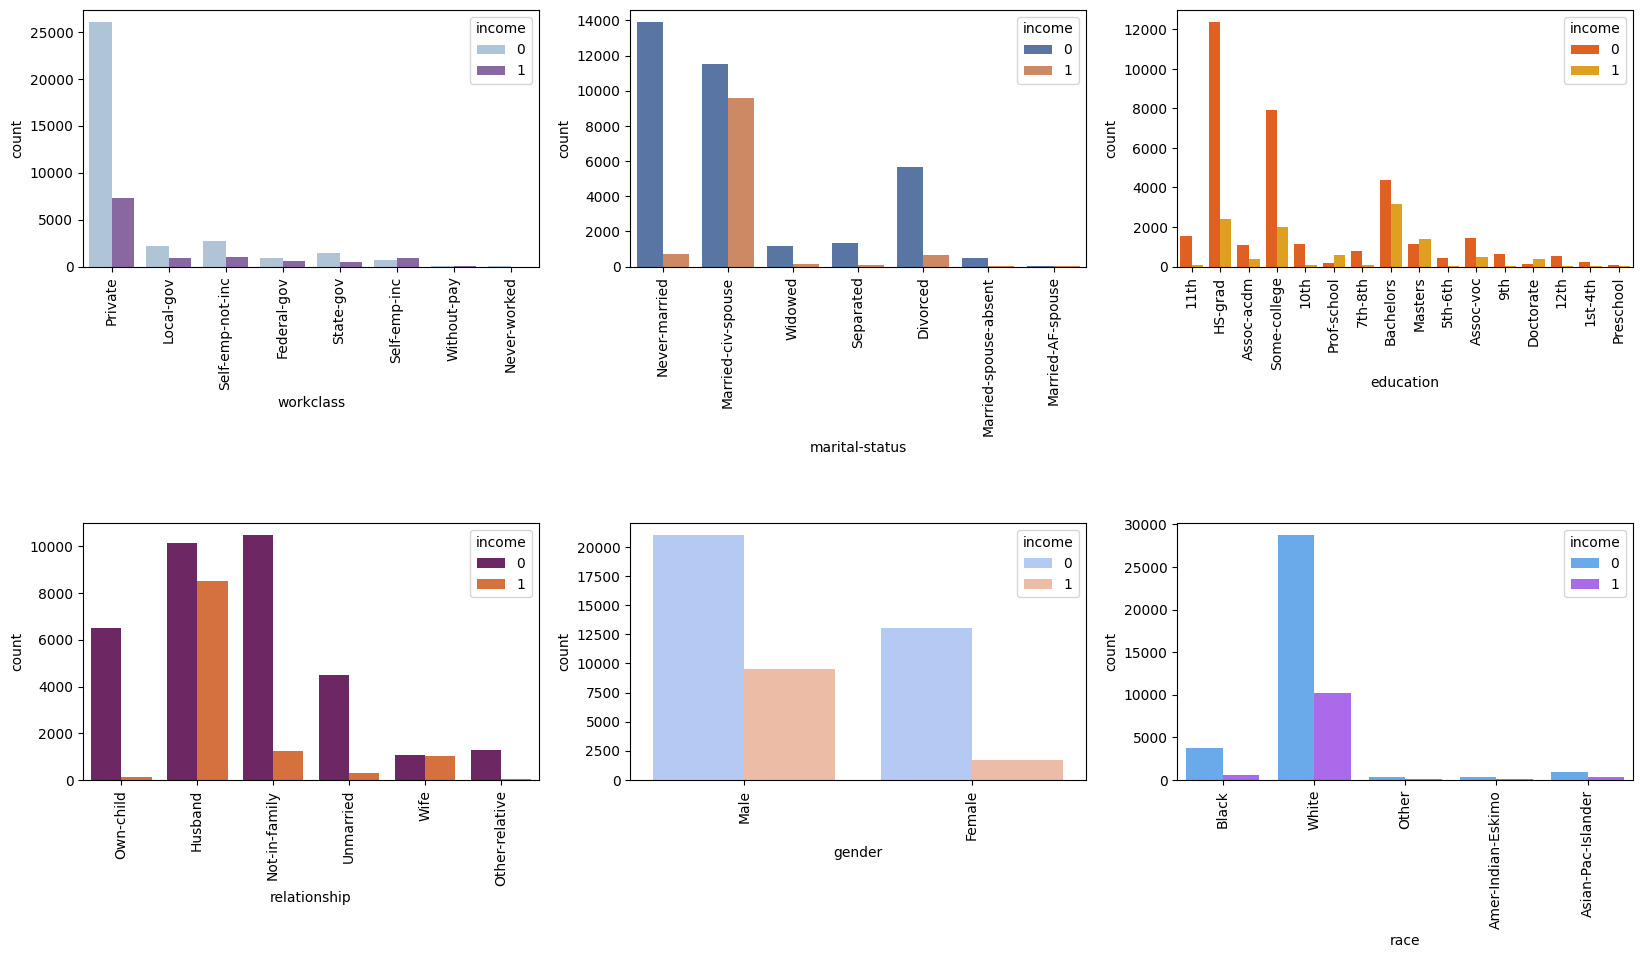

In [23]:
#To find distribution of categorical columns w.r.t income
fig, axes = plt.subplots(figsize=(20, 10))
plt.subplot(231)
sns.countplot(x ='workclass',
hue='income',
data = df,
palette="BuPu")
plt.xticks(rotation=90)
plt.subplot(232)
sns.countplot(x ='marital-status',
hue='income',
data = df,
palette="deep")
plt.xticks(rotation=90)
plt.subplot(233)
sns.countplot(x ='education',
hue='income',
data = df,
palette = "autumn")
plt.xticks(rotation=90)
plt.subplot(234)
sns.countplot(x ='relationship',
hue='income',
data = df,
palette = "inferno")
plt.xticks(rotation=90)
plt.subplot(235)
sns.countplot(x ='gender',
hue='income',
data = df,
palette = "coolwarm")
plt.xticks(rotation=90)
plt.subplot(236)
sns.countplot(x ='race',
hue='income',
data = df,
palette = "cool")
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)
plt.show()


In [24]:
df1 = df.copy()
categorical_features = list(df1.select_dtypes(include=['object']).columns)
print(categorical_features)
df1

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in categorical_features:
        df1[feat] = le.fit_transform(df1[feat].astype(str))
        df1

In [26]:
X = df1.drop(columns = ['income'])
y = df1['income'].values
# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)
print ("Train set size: ", X_train.shape)
print ("Test set size: ", X_test.shape)

from sklearn.ensemble import AdaBoostClassifier
# Train Adaboost Classifer
abc = AdaBoostClassifier(n_estimators = 300, learning_rate=1)
abc_model = abc.fit(X_train, y_train)
#Prediction
y_pred_abc = abc_model.predict(X_test)

Train set size:  (31662, 14)
Test set size:  (13570, 14)


In [27]:
print("Accuracy: ", accuracy_score(y_test, y_pred_abc))
print("F1 score :",f1_score(y_test, y_pred_abc, average='binary'))
print("Precision : ", precision_score(y_test, y_pred_abc))

Accuracy:  0.8697862932940309
F1 score : 0.7143088116410672
Precision :  0.7875222816399287


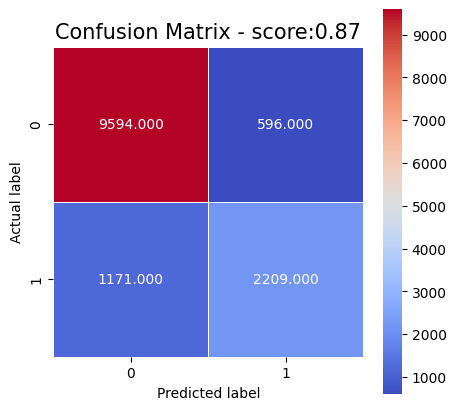

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10190
           1       0.79      0.65      0.71      3380

    accuracy                           0.87     13570
   macro avg       0.84      0.80      0.81     13570
weighted avg       0.87      0.87      0.87     13570



In [28]:
cm = confusion_matrix(y_test, y_pred_abc)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap ="coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix - score:' + str(round(accuracy_score(y_test,y_pred_abc), 2)), size = 15);
plt.show()
print(classification_report(y_test, y_pred_abc))

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
#Training the model with gradient boosting
gbc = GradientBoostingClassifier(
learning_rate = 0.1,
n_estimators = 500,
max_depth = 5,
subsample = 0.9,
min_samples_split = 100,
max_features='sqrt',
random_state=10)
gbc.fit(X_train,y_train)
# Predictions
y_pred_gbc = gbc.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred_gbc))
print("F1 score : ", f1_score(y_test, y_pred_gbc, average = 'binary'))
print("Precision : ", precision_score(y_test, y_pred_gbc))


Accuracy :  0.870891672807664
F1 score :  0.7208413001912045
Precision :  0.7810773480662984


RMSE for gradient boost:  0.359316472197332


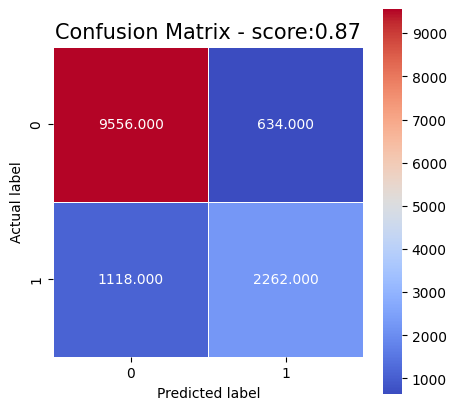

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10190
           1       0.78      0.67      0.72      3380

    accuracy                           0.87     13570
   macro avg       0.84      0.80      0.82     13570
weighted avg       0.87      0.87      0.87     13570



In [30]:
rms = np.sqrt(mean_squared_error(y_test, y_pred_gbc))
print("RMSE for gradient boost: ", rms)

cm = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot = True, fmt=".3f", linewidths = 0.5, square = True, cmap= "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix - score:' + str(round(accuracy_score(y_test,y_pred_gbc),2)), size = 15);
plt.show()
print(classification_report(y_test, y_pred_gbc))

In [31]:
import xgboost as xgb
from xgboost import XGBClassifier
#Training the model with gradient boosting
xgboost = XGBClassifier(learning_rate=0.01,
colsample_bytree = 0.4,
n_estimators=1000,
max_depth=20,
gamma=1)
xgboost_model = xgboost.fit(X_train, y_train)


Accuracy :  0.8736182756079587
F1 score :  0.7250280583613916
Precision :  0.7913895694784739
RMSE for xgboost:  0.3555020736817737


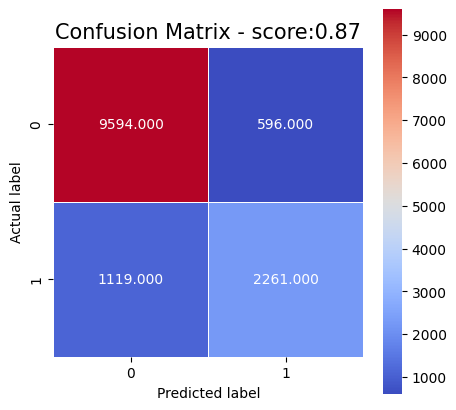

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     10190
           1       0.79      0.67      0.73      3380

    accuracy                           0.87     13570
   macro avg       0.84      0.81      0.82     13570
weighted avg       0.87      0.87      0.87     13570



In [32]:
# Predictions
y_pred_xgboost = xgboost_model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred_xgboost))
print("F1 score : ", f1_score(y_test, y_pred_xgboost, average = 'binary'))
print("Precision : ", precision_score(y_test, y_pred_xgboost))

rms = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
print("RMSE for xgboost: ", rms)

cm = confusion_matrix(y_test, y_pred_xgboost)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap ="coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix - score:'+str(round(accuracy_score(y_test,y_pred_xgboost),2)), size = 15);
plt.show()
print(classification_report(y_test,y_pred_xgboost))


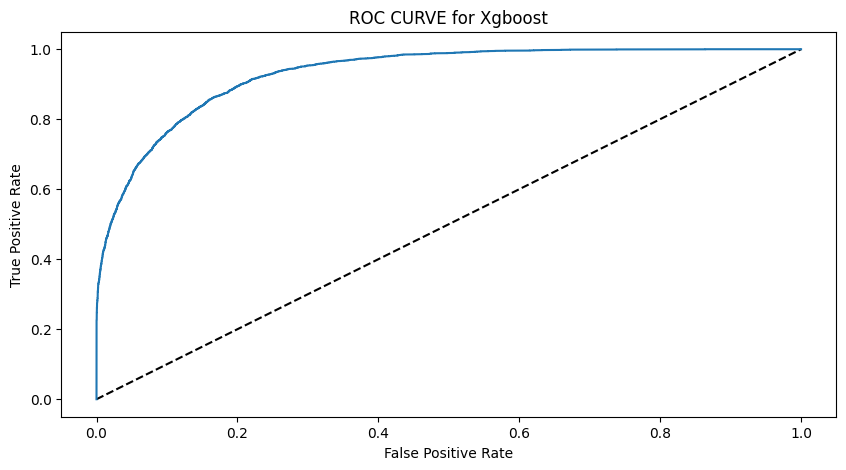

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, xgboost.predict_proba(X_test)[:,1])
plt.figure(figsize = (10,5))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for Xgboost')
plt.show()